#**True Cost of Health**

By:Anye Frimpong

##**Introduction**



This Article aim to show the cost of life insurance as to the current state of the indiviuals themselves. The data is from kaggle from the Medical Cost peronsal database. This is just a database of indiviuals and their health along with how much they pay for their insurance rates and primes. We will see how much a releeievel healthy person pays compared to someone who seems too not prioritize their health or well being. 

In [27]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score, KFold
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [73]:
def map_smoking(column):
    mapped=[]
    
    for row in column:
        
        if row=="yes":
            mapped.append(1)
        else:
            mapped.append(0)
        
        
    return mapped
insurance["smoker_norm"]=map_smoking(insurance["smoker"])

##**Obese Classification**


In [28]:
insurance=pd.read_csv("insurance.csv")
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


This is a function to seperate obese people who are the dataset. All the function does is classify anyone with a bmi above 30.

In [68]:
nonnum_cols=[col for col in insurance.select_dtypes(include=["object"])]

In [75]:
def map_obese(column):
    mapped=[]
    for row in column:
        if row>30:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
insurance["obese"]=map_obese(insurance["bmi"])

Here is the data displayed. It is speerated into age, sex, bmi, children, smokers which region in the United States they would be located in and the chargers of their insurance rates.

In [30]:
insurance.head(5)


,age,sex,bmi,children,smoker,region,charges,obese
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


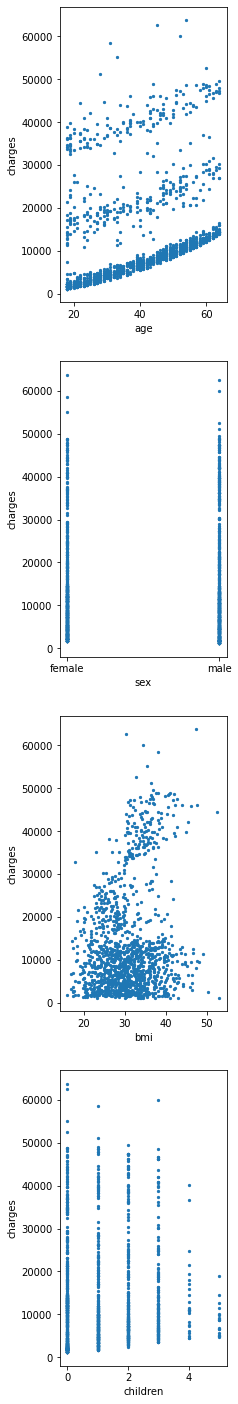

In [72]:
colnum=len(insurance.columns)-3
fig,ax=plt.subplots(colnum,1,figsize=(3,25))
ax[0].set_ylabel("charges")
p_vals={}
for ind,col in enumerate([i for i in insurance.columns if i not in ["smoker", "region","charges","sex_norm"]]):
    
    ax[ind].scatter(insurance[col],insurance.charges,s=5)
    ax[ind].set_xlabel(col)
    ax[ind].set_ylabel("charges")    
plt.show()

##**What does the Data tell Us**

The Data tells me that in terms of many factors it somewhat shapes the charges of the insurance rates. For example the age shows that generally as the age of the cilents go up so do the charges of the insurance rate. This can be due to the fact that the older you get the higher the chance of you becoming ill and higher chance of hopitalization. As for gender and sex it seems that both male and female pays around the same amount for their insurance. BMI shows that generaly that the higher the BMI the more the cost of the insurance. 

Chrildren data is kinda of surpising. I assume that the reason why chrildren insurance rate is higher when they are younger while the data in the first graph shows that the older a person is the more they pay for their insurance could be because of the hopital visits and the medical attentation that a new born baby would reevieve compared to a toddler. So insurances mabe higher than that of a toddler. However after the age of 6 the child insurance rate is low and may pick up again as the child ages to an adult. 

##**Greatest Impacts**

age :  0.2990081933306476
bmi :  0.1983409688336288
children :  0.0679982268479048
charges :  1.0
smoker_norm :  0.7872514304984775
obese :  0.19968322199588243


Text(0, 0.5, 'Absolute correlation')

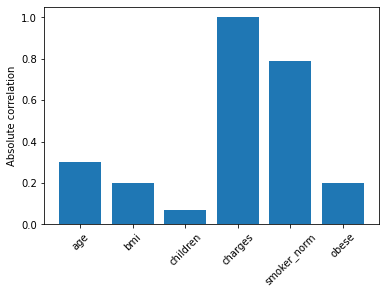

In [76]:
corr_vals=[]
collabel=[]
for col in [i for i in insurance.columns if i not in nonnum_cols]:
    
    p_val=sp.stats.pearsonr(insurance[col],insurance["charges"])
    corr_vals.append(np.abs(p_val[0]))
    print(col,": ",np.abs(p_val[0]))
    collabel.append(col)
plt.bar(range(1,len(corr_vals)+1),corr_vals)
plt.xticks(range(1,len(corr_vals)+1),collabel,rotation=45)
plt.ylabel("Absolute correlation")

These factors where the biggest impact on the insurance rate of the cilents. The 3 biggest imact excuding the charges are that if the person is a smoker, the person's age and if the person is obese or not. BMI comes after and of course if the perosn is a child or not. These factors show that a person's health plays a big role in how much they will be paying for health insurance. The reason being that the poorer the health of the indiviual the more it will cost to keep them alive. This is more evident seeing that smoking has a huge impact on someones insurance. This maybe due to the relation of lung cancer and cigarettes. Someone who smokes cigarettes often have a huge probability of recieving Lung cancor. Which will then lead to high hopital costs. The same is with someone who has a high BMI and if the person is obese. Someone with high BMI and someone who is obese will likely runinto many health issues as well which will also lead into high hopital bills. So these people with these factors are charged heavily because of the likelyhood of them falling into illnesses. 